In [21]:
import pandas as pd 
# import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from pprint import pprint
from xgboost import XGBClassifier
from xgboost import plot_tree
pd.set_option('display.max_columns', 128)
from sklearn.metrics import log_loss
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pprint import pprint
from sklearn.ensemble import GradientBoostingClassifier
# from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix
# from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix,r2_score
# import warnings
# warnings.filterwarnings('error')
# import warnings
# from mlxtend.classifier import StackingClassifier
# import missingno as msno
# from sklearn.ensemble import VotingClassifier
# import shap
# shap.initjs()
# import lime
# from lime import lime_tabular
# warnings.simplefilter('ignore')

In [22]:
train = pd.read_csv('insurance_data.csv')
train[:5]

,BMI,Medical_History_23,Medical_History_4,Product_Info_4,Wt,Ins_Age,Medical_Keyword_15,Medical_Keyword_3,InsuredInfo_6,Family_Hist_3,Family_Hist_4,Medical_History_30,Response
0,0.323008,3,1,0.076923,0.148536,0.641791,0,0,2,0.598039,NaN,2,1
1,0.272288,3,1,0.076923,0.131799,0.059701,0,0,2,NaN,0.084507,2,0
2,0.428780,3,2,0.076923,0.288703,0.029851,0,0,1,NaN,0.225352,2,1
3,0.352438,3,2,0.487179,0.205021,0.164179,0,0,2,NaN,0.352113,2,1
4,0.424046,3,2,0.230769,0.234310,0.417910,0,0,2,NaN,0.408451,2,1


In [23]:
# Data for all the independent variables
trans_X = train.drop(labels='Response',axis=1)

# Data for the dependent variable
trans_Y = train['Response']

In [24]:
train.isnull().sum()

BMI                       0
Medical_History_23        0
Medical_History_4         0
Product_Info_4            0
Wt                        0
Ins_Age                   0
Medical_Keyword_15        0
Medical_Keyword_3         0
InsuredInfo_6             0
Family_Hist_3         34241
Family_Hist_4         19184
Medical_History_30        0
Response                  0
dtype: int64

In [25]:
train.shape

(59381, 13)

In [26]:
# Filling remaining missing values with mean
trans_X = trans_X.fillna(trans_X.mean())

In [27]:
trans_X.isnull().sum()

BMI                   0
Medical_History_23    0
Medical_History_4     0
Product_Info_4        0
Wt                    0
Ins_Age               0
Medical_Keyword_15    0
Medical_Keyword_3     0
InsuredInfo_6         0
Family_Hist_3         0
Family_Hist_4         0
Medical_History_30    0
dtype: int64

In [28]:
# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(trans_X,trans_Y,test_size = 0.2, random_state=1)

In [29]:
# Utility Functions
def check_scores(model, X_train, X_test ):
  # Making predictions on train and test data

  train_class_preds = model.predict(X_train)
  test_class_preds = model.predict(X_test)


  # Get the probabilities on train and test
  train_preds = model.predict_proba(X_train)[:,1]
  test_preds = model.predict_proba(X_test)[:,1]


  # Calculating accuracy on train and test
  train_accuracy = accuracy_score(Y_train,train_class_preds)
  test_accuracy = accuracy_score(Y_test,test_class_preds)

  print("The accuracy on train dataset is", train_accuracy)
  print("The accuracy on test dataset is", test_accuracy)
  print()
  # Get the confusion matrices for train and test
  train_cm = confusion_matrix(Y_train,train_class_preds)
  test_cm = confusion_matrix(Y_test,test_class_preds )

  print('Train confusion matrix:')
  print( train_cm)
  print()
  print('Test confusion matrix:')
  print(test_cm)
  print()

  # Get the roc_auc score for train and test dataset
  train_auc = roc_auc_score(Y_train,train_preds)
  test_auc = roc_auc_score(Y_test,test_preds)

  print('ROC on train data:', train_auc)
  print('ROC on test data:', test_auc)
  
  # Fscore, precision and recall on test data
  f1 = f1_score(Y_test, test_class_preds)
  precision = precision_score(Y_test, test_class_preds)
  recall = recall_score(Y_test, test_class_preds) 
  
  
  #R2 score on train and test data
  train_log = log_loss(Y_train,train_preds)
  test_log = log_loss(Y_test, test_preds)

  print()
  print('Train log loss:', train_log)
  print('Test log loss:', test_log)
  print()
  print("F score is:",f1 )
  print("Precision is:",precision)
  print("Recall is:", recall)
  return model, train_auc, test_auc, train_accuracy, test_accuracy,f1, precision,recall, train_log, test_log

def grid_search(model, parameters, X_train, Y_train):
  #Doing a grid
  grid = GridSearchCV(estimator=model,
                       param_grid = parameters,
                       cv = 2, verbose=2, scoring='roc_auc')
  #Fitting the grid 
  grid.fit(X_train,Y_train)
  print()
  print()
  # Best model found using grid search
  optimal_model = grid.best_estimator_
  print('Best parameters are: ')
  pprint( grid.best_params_)

  return optimal_model


In [30]:
#finding the best model
gb_parameters ={
    "n_estimators":[5,50,250],
    "max_depth":[1,3,5,7],
    "learning_rate":[0.01,0.1,1]
}

pprint(gb_parameters)

gb_optimal_model = grid_search(GradientBoostingClassifier(), gb_parameters, X_train, Y_train)

{'learning_rate': [0.01, 0.1, 1],
 'max_depth': [1, 3, 5, 7],
 'n_estimators': [5, 50, 250]}
Fitting 2 folds for each of 36 candidates, totalling 72 fits
[CV] END ....learning_rate=0.01, max_depth=1, n_estimators=5; total time=   0.1s
[CV] END ....learning_rate=0.01, max_depth=1, n_estimators=5; total time=   0.1s
[CV] END ...learning_rate=0.01, max_depth=1, n_estimators=50; total time=   0.4s
[CV] END ...learning_rate=0.01, max_depth=1, n_estimators=50; total time=   0.4s
[CV] END ..learning_rate=0.01, max_depth=1, n_estimators=250; total time=   2.1s
[CV] END ..learning_rate=0.01, max_depth=1, n_estimators=250; total time=   2.0s
[CV] END ....learning_rate=0.01, max_depth=3, n_estimators=5; total time=   0.1s
[CV] END ....learning_rate=0.01, max_depth=3, n_estimators=5; total time=   0.1s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   1.0s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   1.0s
[CV] END ..learning_rate=0.01, max_d

In [31]:
# Getting the scpres for all the score metrics used here
gb_model, gb_train_auc, gb_test_auc, gb_train_accuracy, gb_test_accuracy,gb_f1, gb_precision,gb_recall,gb_train_log, gb_test_log = check_scores(gb_optimal_model, X_train, X_test )

The accuracy on train dataset is 0.8239516672280229
The accuracy on test dataset is 0.8227666919255704

Train confusion matrix:
[[27365  4508]
 [ 3855 11776]]

Test confusion matrix:
[[6879 1140]
 [ 965 2893]]

ROC on train data: 0.901887682346118
ROC on test data: 0.8979983774926462

Train log loss: 0.36586784407928885
Test log loss: 0.37025812006534975

F score is: 0.7332404004562159
Precision is: 0.7173320109099925
Recall is: 0.7498703991705546


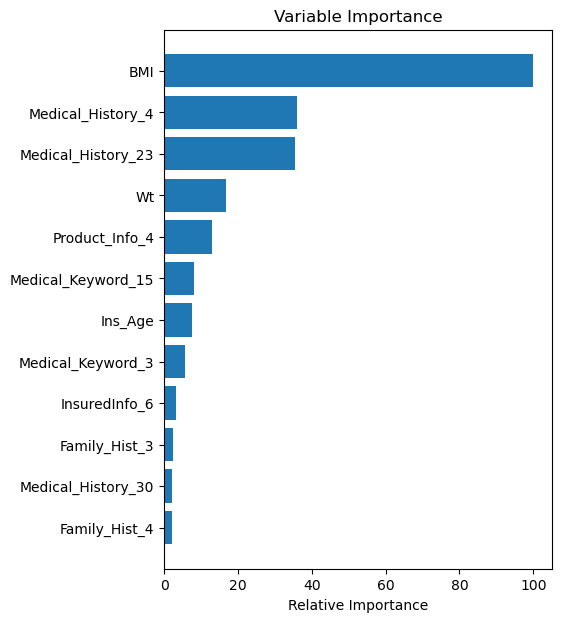

In [32]:
# Plot feature importance
feature_importance = gb_model.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

plt.figure(figsize=(5,7))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [33]:
import pickle

In [34]:
y_pred =gb_optimal_model.predict_proba(X_test)
y_pred

array([[0.99833517, 0.00166483],
       [0.26865148, 0.73134852],
       [0.70020522, 0.29979478],
       ...,
       [0.34485453, 0.65514547],
       [0.14770333, 0.85229667],
       [0.85488584, 0.14511416]])

In [35]:
#data ={"model":gb_optimal_model,}
with open("saved_steps.pkl","wb") as file:
    pickle.dump(X_test,file)

In [36]:
with open("saved_steps.pkl","rb") as file:
    data =pickle.load(file)